# PREPROCESSING


In [1]:
import numpy as np #array operations
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt #to show image
import os #to iterate through directories and join paths
import cv2 #image operations

In [2]:
#data directory
directory = "/Users/margheritamaroni/Desktop/DATA SCIENCE AND ECONOMICS/ALGORITHMS FOR MASSIVE DATA, CLOUD AND DISTRIBUTED COMPUTING/face_comic/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela"
#the two categories we have to deal with 
subfolders = ["comics", "faces"]

In [3]:
#which is the directory of the subsubfolder faces
faces = os.path.join(directory, subfolders[1])

In [4]:
#directory of the subsubfolder comics
comics = os.path.join(directory, subfolders[0])

In [5]:
#look at the files contained in the subsubfolder comics
os.listdir(comics)[:10]

['9733.jpg',
 '63.jpg',
 '6400.jpg',
 '823.jpg',
 '4217.jpg',
 '3578.jpg',
 '2666.jpg',
 '5109.jpg',
 '2100.jpg',
 '4571.jpg']

In [6]:
faces, os.listdir(faces)[50]

('/Users/margheritamaroni/Desktop/DATA SCIENCE AND ECONOMICS/ALGORITHMS FOR MASSIVE DATA, CLOUD AND DISTRIBUTED COMPUTING/face_comic/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces',
 '3550.jpg')

(1024, 1024, 3)

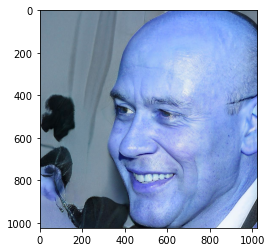

In [7]:
#image to array
image_to_array = cv2.imread(os.path.join(faces, os.listdir(faces)[50]))
image_to_array.shape #shape 1024, 1024, 3 --> with three channels (colors: blue, red, green)
plt.imshow(image_to_array)

In [8]:
#Per ridurre qualità dell'immagine, più sgranata 
cv2.IMREAD_REDUCED_GRAYSCALE_4

32

In [10]:
#subfolders = folder that contains other two folders that are comics and faces
#subsubfolders = comics and faces 
for subsubfolders in subfolders:
    print(subsubfolders)

comics
faces


In [11]:
for subsubfolders in subfolders:
    path = os.path.join(directory, subsubfolders)
    print(path)
#this for cycle give us the directories for the two subsubfolders:
#comics and faces

/Users/margheritamaroni/Desktop/DATA SCIENCE AND ECONOMICS/ALGORITHMS FOR MASSIVE DATA, CLOUD AND DISTRIBUTED COMPUTING/face_comic/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics
/Users/margheritamaroni/Desktop/DATA SCIENCE AND ECONOMICS/ALGORITHMS FOR MASSIVE DATA, CLOUD AND DISTRIBUTED COMPUTING/face_comic/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces


In [9]:
#use what is done in previous chunks and then assign labels to the two subsubfolders
for subsubfolders in subfolders:
    path = os.path.join(directory, subsubfolders)
    #save in an object the index of the category (0 or 1)
    label_class = subfolders.index(subsubfolders)
    print(path, label_class)
#the function assigns 
# - label 1 to real faces 
# - label 0 to comics 

/Users/margheritamaroni/Desktop/DATA SCIENCE AND ECONOMICS/ALGORITHMS FOR MASSIVE DATA, CLOUD AND DISTRIBUTED COMPUTING/face_comic/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics 0
/Users/margheritamaroni/Desktop/DATA SCIENCE AND ECONOMICS/ALGORITHMS FOR MASSIVE DATA, CLOUD AND DISTRIBUTED COMPUTING/face_comic/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces 1


In [13]:
#Until now I got the paths (directories) at which I can find the subsubfolders faces and comics
#Now, I can create two lists: one containing files of the subsubfolder faces, 
# the other containing files of the subsubfolders comics. 


In [10]:
#Here I try to figure out the names of the files contained in the subsubfolder faces 
# and I print the names of the first ten files 
#here we are retrieving the files of subsubfolder faces because the last directory seen was the ones of faces
for pic in os.listdir(path)[:10]: #prendiamo le prime 10 immagini
    print(pic)

9733.jpg
63.jpg
6400.jpg
823.jpg
4217.jpg
3578.jpg
2666.jpg
5109.jpg
2100.jpg
4571.jpg


In [12]:
#Create a for cycle through which I add the name of each file (images) at the end of the directory if the subfolder
# it creates like an append at the end of the directory of the subfolder
for subsubfolders in subfolders:
    path = os.path.join(directory, subsubfolders)
    label_class = subfolders.index(subsubfolders)
    print("Below the first 10 images of", subsubfolders)
    for pic in os.listdir(path)[:10]:
        print(pic)

    

Below the first 10 images of comics
9733.jpg
63.jpg
6400.jpg
823.jpg
4217.jpg
3578.jpg
2666.jpg
5109.jpg
2100.jpg
4571.jpg
Below the first 10 images of faces
9733.jpg
63.jpg
6400.jpg
823.jpg
4217.jpg
3578.jpg
2666.jpg
5109.jpg
2100.jpg
4571.jpg


In [14]:
#try to transform the last pic of the previous list in an array 
array_pic = cv2.imread(os.path.join(path, pic)) #red, green, blue --> three channels of colors
array_pic
array_pic.shape

(1024, 1024, 3)

In [15]:
#I re-do the same thing but I specify the 0 since I want only one dimension of color
array_pic = cv2.imread(os.path.join(path, pic), 0)
array_pic
array_pic.shape #no third dimension

array([[222, 223, 225, ..., 113,  75,  69],
       [227, 228, 228, ...,  79,  56,  72],
       [234, 233, 232, ...,  69,  62,  95],
       ...,
       [237, 223, 208, ..., 187, 221, 194],
       [231, 228, 218, ..., 203, 236, 190],
       [219, 227, 226, ..., 212, 238, 176]], dtype=uint8)

In [16]:
#At this stage we are ready to create a list that contains the images and their labels 
#starting from an empty list
#partiamo da una lista vuota e poi facciamo append 
images = []

In [22]:
#for subsubfolders in subfolders: 
#    path = os.path.join(directory, subsubfolders)
#    label_class = subfolders.index(subsubfolders)
#    for pic in os.listdir(path):
#        array_pic = cv2.imread(os.path.join(path, pic),0)
#        images.append([array_pic,label_class])

In [17]:
#the for cycle just created above is insterted into a function that create the dataset 
def dataset():
    for subsubfolders in subfolders: 
        path = os.path.join(directory, subsubfolders)
        label_class = subfolders.index(subsubfolders)
        for pic in os.listdir(path):
            array_pic = cv2.imread(os.path.join(path, pic),0)
            array_pic = cv2.resize(array_pic,(250, 250)) #make the image size 250*250
            images.append([array_pic,label_class])
    

In [18]:
dataset()

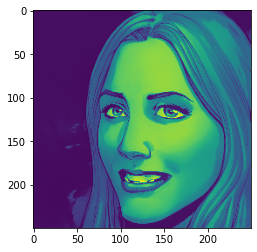

In [22]:
#look at how it is the 110th element of my dataset: 
#the object is composed by two elements: an array of pixels and the true label
images[110]

#Indeed if I print the image 110 
plt.imshow(images[110] [0]) # [0] is the first element of the list

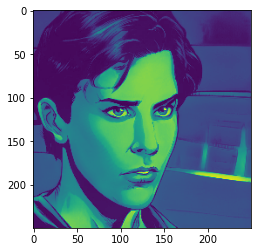

In [23]:
# total number of images = 20'000 
#The first 10'000 images of the list are comics, while the following 10'000 are faces
# I need to do a reshuffle because I need to divide my dataset in train and test
import random
shuffled_images = random.sample(images, 20000)

#check that they are shuffled --> image 19'000 now it's a comic
plt.imshow(shuffled_images[19000][0]) 

In [24]:
#From the 20'000 lists obtained, we saw that each list contains two values: matrix with pixels and label of the image
#at this stage we want to separate those two lists: 
# - create one list named P with all the matrices containing pixels 
# - create a second list named L with all labels (0 or 1)
#thereafter, P and L will be used for train and test sets
P = [] #features set (pixels)
L = [] #label set

In [25]:
for example in shuffled_images:
    P.append(example[0])
    L.append(example[1])

In [26]:
#check P are only matrices of pixels for the first image
P[:1] #matrix with pixels
P[1].shape

[array([[199, 203, 200, ..., 184, 190, 193],
        [203, 203, 202, ..., 186, 188, 188],
        [201, 201, 201, ..., 187, 188, 187],
        ...,
        [210, 210, 211, ...,  49,  48,  36],
        [210, 212, 212, ...,  48,  50,  45],
        [215, 211, 210, ...,  47,  44,  37]], dtype=uint8)]

In [27]:
#check L are only labels for the first ten images
L[:10] #labels
len(L) 

[1, 0, 1, 1, 0, 0, 1, 0, 0, 1]

# NOW WE ARE READY FOR TRAIN AND TEST SPLIT AND FOR DEFINING THE MODEL

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#transform lists P and L in array 
P = np.array(P)
L = np.array(L)

In [30]:
input_shape = (1024, 1024) 
x_train, x_test, y_train, y_test = train_test_split(P, L, train_size = 0.7, random_state = 3456)

In [42]:
x_train.shape

(14000, 250, 250)

In [31]:
x_train.reshape(14000,250*250,-1) #In order to fill the NN we need to flatten our training set

array([[[ 17],
        [ 17],
        [ 17],
        ...,
        [168],
        [165],
        [184]],

       [[ 85],
        [ 91],
        [ 77],
        ...,
        [173],
        [165],
        [198]],

       [[ 67],
        [ 61],
        [ 50],
        ...,
        [ 74],
        [ 76],
        [ 82]],

       ...,

       [[204],
        [202],
        [198],
        ...,
        [164],
        [156],
        [164]],

       [[110],
        [113],
        [ 88],
        ...,
        [160],
        [131],
        [119]],

       [[  4],
        [ 18],
        [ 23],
        ...,
        [ 36],
        [ 36],
        [ 49]]], dtype=uint8)

In [32]:
#One Hot encoding 
from sklearn.preprocessing import OneHotEncoder

In [33]:
encoder = OneHotEncoder(sparse=False)

In [34]:
y_train_encoded = encoder.fit_transform(y_train.reshape(-1,1))

In [35]:
y_train_encoded[:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [36]:
y_test_encoded=encoder.fit_transform(y_test.reshape(-1,1))

In [37]:
y_test_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

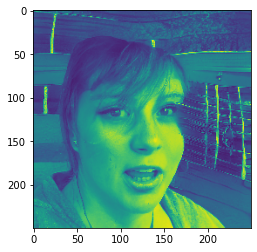

In [39]:
plt.imshow(x_train[10])

In [40]:
y_train_encoded[10] #one hot encoded label

array([0., 1.])

In [41]:
np.argmax(y_train_encoded[10]) #--> true label 1

1

In [42]:
#model with simple neural networks
simple_nn = keras.Sequential(
    [
        keras.Input(shape=(250,250)), 
        #250 neurons in input (x1,...,xn) that receives as input a signal that is an array of 250 values
        layers.Flatten(),
        layers.Dense(2, activation="softmax"), #2 represent the number of classes
    ]
)

simple_nn.summary()

batch_size = 250
epochs = 10

simple_nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


history = simple_nn.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 62500)             0         
                                                                 
 dense (Dense)               (None, 2)                 125002    
                                                                 
Total params: 125,002
Trainable params: 125,002
Non-trainable params: 0
_________________________________________________________________


2022-03-16 14:03:08.366468: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
51/51 [==============================] - 5s 72ms/step - loss: 730.3536 - accuracy: 0.7848 - val_loss: 120.6066 - val_accuracy: 0.9036
Epoch 2/10
51/51 [==============================] - 3s 51ms/step - loss: 37.4563 - accuracy: 0.9448 - val_loss: 16.1157 - val_accuracy: 0.9636
Epoch 3/10
51/51 [==============================] - 3s 63ms/step - loss: 8.5292 - accuracy: 0.9763 - val_loss: 5.7657 - val_accuracy: 0.9764
Epoch 4/10
51/51 [==============================] - 2s 45ms/step - loss: 5.8218 - accuracy: 0.9779 - val_loss: 25.3025 - val_accuracy: 0.9257
Epoch 5/10
51/51 [==============================] - 2s 41ms/step - loss: 17.1345 - accuracy: 0.9563 - val_loss: 6.6614 - val_accuracy: 0.9793
Epoch 6/10
51/51 [==============================] - 2s 40ms/step - loss: 5.8559 - accuracy: 0.9790 - val_loss: 4.9135 - val_accuracy: 0.9807
Epoch 7/10
51/51 [==============================] - 2s 40ms/step - loss: 2.0598 - accuracy: 0.9899 - val_loss: 1.4623 - val_accuracy: 0.9907
Epoch

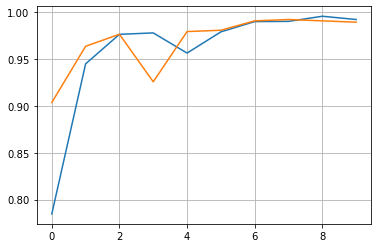

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

In [44]:
#PREDICTIONS ON THE TEST
predictions = simple_nn.predict(x_test)

In [45]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

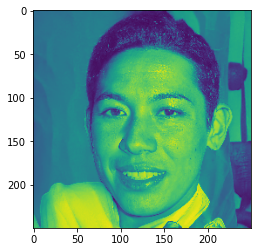

In [46]:
plt.imshow(x_test[0])

In [47]:
y_test_encoded[0]

array([0., 1.])

In [48]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

In [49]:
array_pred = np.argmax(predictions, axis =1)
len(array_pred)

6000

In [50]:
misclassified = []
for num in range(len(y_test)):
    if array_pred[num] != y_test[num]:
        misclassified.append(num)
misclassified

[33,
 68,
 93,
 191,
 198,
 397,
 459,
 477,
 509,
 722,
 742,
 900,
 937,
 959,
 992,
 1083,
 1090,
 1112,
 1361,
 1366,
 1682,
 1776,
 1878,
 1898,
 2125,
 2224,
 2327,
 2402,
 2430,
 2454,
 2478,
 2479,
 2552,
 2568,
 2602,
 2703,
 2726,
 2747,
 2835,
 2907,
 2964,
 2980,
 3123,
 3263,
 3350,
 3382,
 3414,
 3816,
 3872,
 3911,
 3966,
 3981,
 4011,
 4139,
 4271,
 4285,
 4456,
 4507,
 4584,
 4710,
 4772,
 4828,
 5266,
 5271,
 5477,
 5522,
 5589,
 5610,
 5895,
 5949]

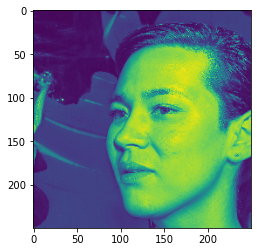

In [54]:
plt.imshow(x_test[5949])

In [55]:
array_pred[5949],y_test[5949]

(0, 1)

In [53]:
#test accuracy 
score = simple_nn.evaluate(x_test, y_test_encoded, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.3068294525146484
Test accuracy: 0.9883333444595337
